**EXERCISE_7_02**

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# read the csv data
instant_p_energy_solid = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_02/NSL_SIMULATOR/OUTPUT/OUTPUT_SOLID/instant_penergy.dat")

In [3]:
x = np.arange(0, len(instant_p_energy_solid[:]))

In [4]:
mean = np.mean(instant_p_energy_solid[:])

In [5]:
autocorrelazione = np.correlate(instant_p_energy_solid - mean, instant_p_energy_solid - mean, mode='full')

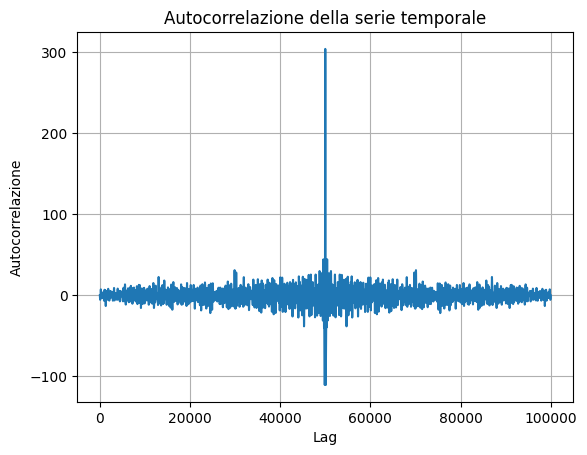

In [6]:
plt.plot(autocorrelazione)
plt.xlabel('Lag')
plt.ylabel('Autocorrelazione')
plt.title('Autocorrelazione della serie temporale')
plt.grid(True)
plt.show()